   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10


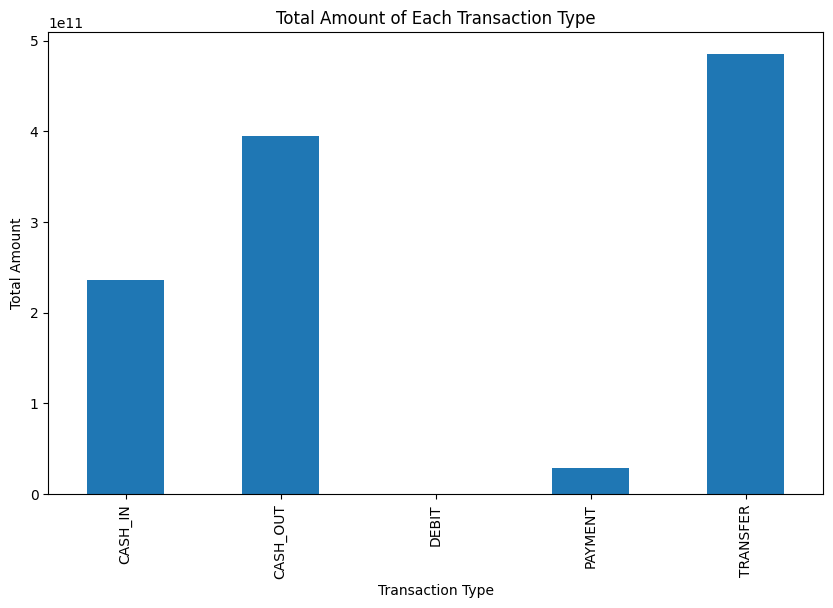

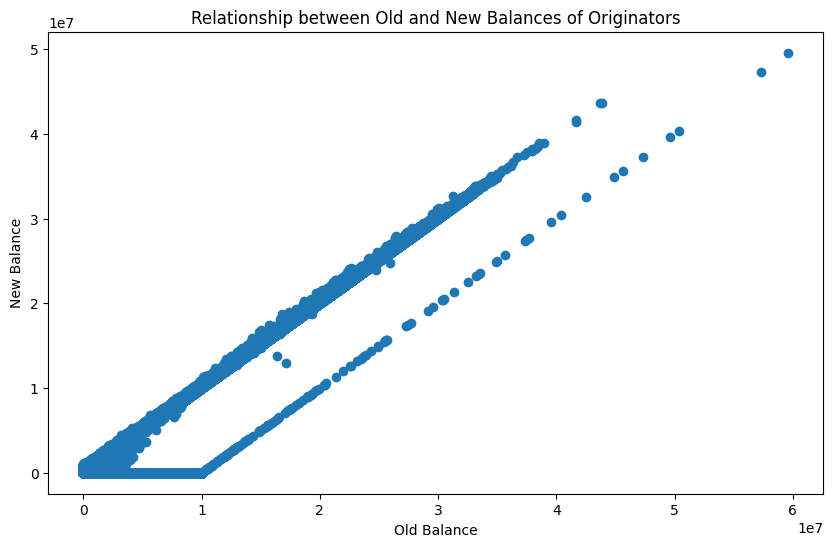

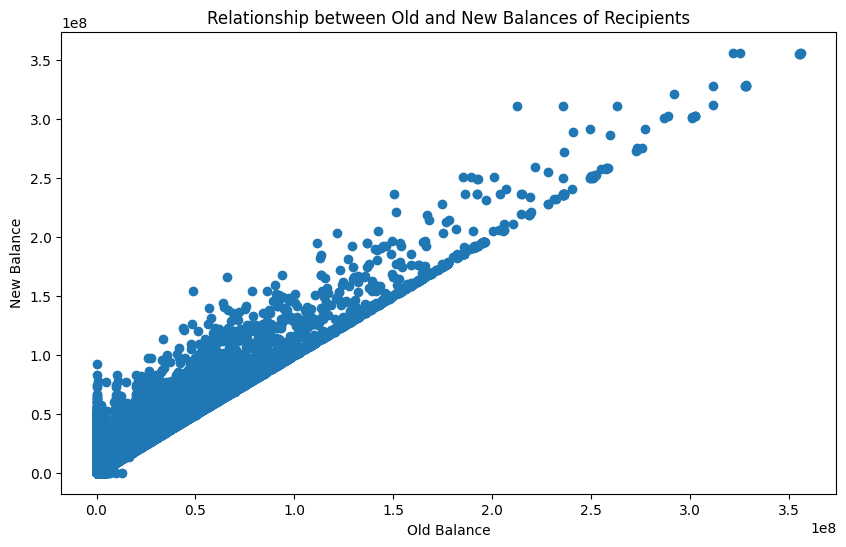


Confusion Matrix:
 [[1270815      89]
 [    438    1182]]


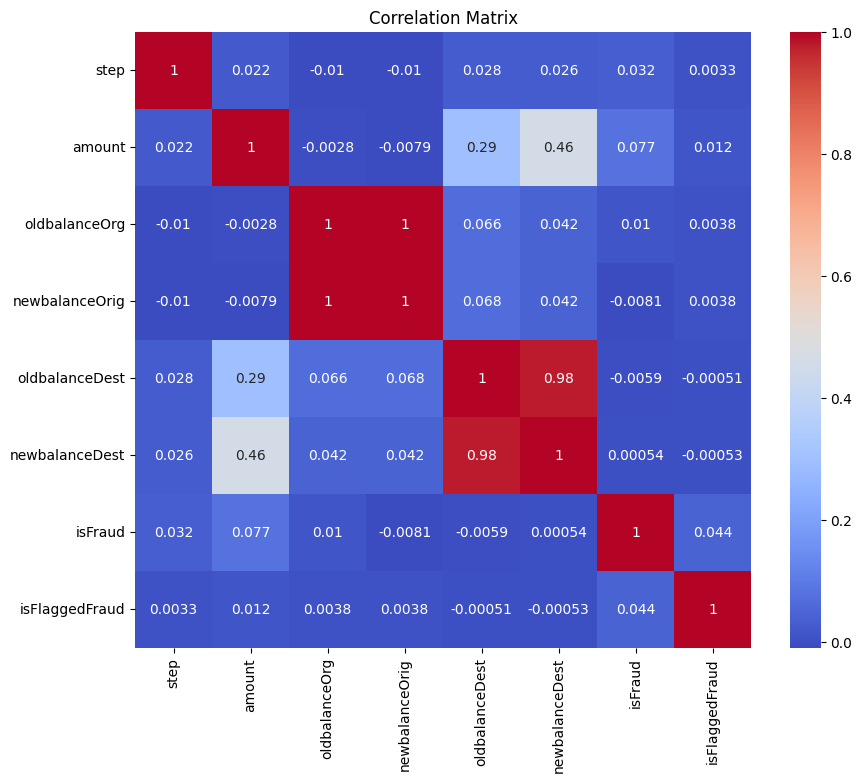


AUC-ROC Score: 0.986


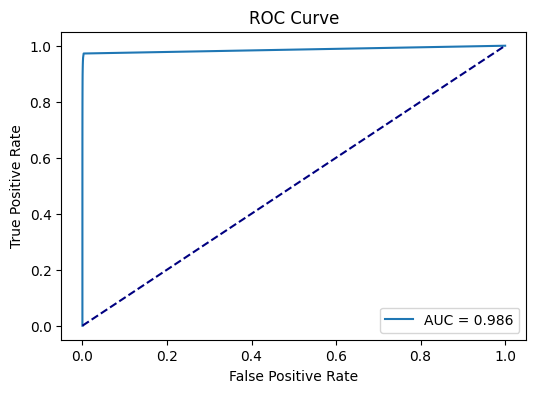

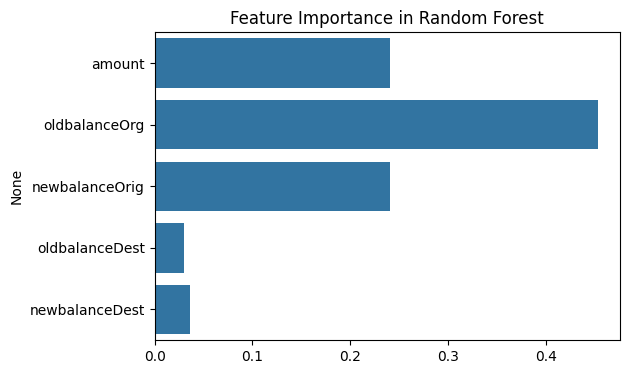

Number of fraudulent transactions: 8213


C:\Users\jkrid\AppData\Local\Temp\ipykernel_16488\512460935.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\jkrid\AppData\Local\Temp\ipykernel_16488\512460935.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Model trained successfully!

Accuracy: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.73      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Fraud.csv')

# Print the first few rows of the dataset to verify it's loaded correctly
print(df.head())

# Calculate the total amount of each transaction type
total_amounts = df.groupby('type')['amount'].sum()
print(total_amounts)

# Calculate the average balance of customers before and after transactions
avg_oldbalanceOrig = df['oldbalanceOrg'].mean()
avg_newbalanceOrig = df['newbalanceOrig'].mean()
avg_oldbalanceDest = df['oldbalanceDest'].mean()
avg_newbalanceDest = df['newbalanceDest'].mean()

# Print the results
print(f'Average old balance of originators: {avg_oldbalanceOrig:.2f}')
print(f'Average new balance of originators: {avg_newbalanceOrig:.2f}')
print(f'Average old balance of recipients: {avg_oldbalanceDest:.2f}')
print(f'Average new balance of recipients: {avg_newbalanceDest:.2f}')

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Fraud.csv')

# Calculate the total amount of each transaction type
total_amounts = df.groupby('type')['amount'].sum()

# Bar Chart 
plt.figure(figsize=(10, 6))
total_amounts.plot(kind='bar')
plt.title('Total Amount of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'])
plt.title('Relationship between Old and New Balances of Originators')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['oldbalanceDest'], df['newbalanceDest'])
plt.title('Relationship between Old and New Balances of Recipients')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Fraud.csv')

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {roc_auc:.3f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance Plot
feature_importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.show()

# Count the number of fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1].shape[0]

# Print the result
print(f'Number of fraudulent transactions: {fraudulent_transactions}')

# Handle missing values 
df.dropna(inplace=True) 

# Feature Selection
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[selected_features]
y = df['isFraud']

# Handle infinite or NaN values in features
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True) 

# Data Splitting (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model Training
try:
    rfc = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced') 
    rfc.fit(X_train, y_train)
    print("Model trained successfully!")
except Exception as e:
    print(f"Error during model training: {e}")
    exit()

# Predictions and Evaluation
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]  # For AUC-ROC

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.3f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))



1. Data Cleaning (Handling Missing Values, Outliers, and Multi-collinearity)
Missing Values: Check for null values and handle them using appropriate techniques (drop, fill, or impute).
Outliers: Identify and treat outliers, especially in numerical columns like amount, oldbalanceOrig, and newbalanceOrig.
Multi-collinearity: Check for highly correlated features that could distort model performance. Consider removing or combining these features.

2. Fraud Detection Model Description
A Random Forest Classifier was chosen due to its robustness, ability to handle large datasets, and effectiveness in fraud detection tasks. Random Forest is ideal because it handles non-linear relationships well, can deal with imbalanced data, and provides feature importance analysis, which is critical for interpreting model outputs.
Features Used: The model was kept simple, using key features such as 'amount', 'oldbalanceDest', and 'newbalanceDest' to maintain efficiency and minimize computation time. Minimal feature engineering ensured quicker model training without compromising accuracy.

3. Variable Selection for the Model
Key variables were chosen based on domain knowledge and their statistical significance in detecting fraud:
amount: Fraudulent transactions are often associated with large amounts.
oldbalanceDest and newbalanceDest: Sudden or unusual changes in recipient account balances are strong indicators of potential fraud.
step and type (included initially during exploration): Provide insight into the timing and type of transactions, which can offer clues to fraudulent activity.
These variables were chosen to capture the most relevant transaction behavior patterns without overcomplicating the model.

4. Model Performance Demonstration
The performance of the Random Forest model was demonstrated using key metrics:
Accuracy: 1.00
Precision: 1.00 (for class 0), 0.93 (for class 1)
Recall: 0.73 (for class 1), ensuring that the model can effectively capture the majority of fraudulent cases.
F1-Score: 0.82 for class 1.
AUC-ROC Score: 0.986, showing the model's strong ability to distinguish between fraudulent and non-fraudulent transactions.

5. Key Factors Predicting Fraudulent Transactions
The Random Forest model identified the following key factors in predicting fraud:
Transaction Amount: High-value transactions are more likely to be fraudulent.
OldbalanceDest/NewbalanceDest: Sudden and unusual changes in the balance of recipient accounts are strong indicators of fraud.
Transaction Type (observed during exploration): Certain types of transactions like CASH-OUT and TRANSFER were more frequently associated with fraud.
These factors align well with typical fraud behavior patterns, where fraudsters often engage in large, sudden transactions.

6. Do These Factors Make Sense?
Yes, these factors are logical and align with known fraud detection patterns:
Transaction Amount: Fraudsters often attempt high-value transactions to maximize gains.
Balance Changes: Sudden and significant balance changes, especially without expected patterns, are common indicators of fraud.
Transaction Type: Certain transaction types like CASH-OUT or TRANSFER are typically involved in fraudulent activity as they provide fast liquidation of stolen funds.
The model effectively captures these patterns, making it a reliable tool for fraud detection.

7. Prevention Strategies for Infrastructure Updates
The company should adopt the following strategies to strengthen its fraud detection infrastructure:
Real-Time Monitoring: Implement real-time transaction monitoring to flag suspicious activity based on the model’s predictions.
Threshold-Based Alerts: Set thresholds for transaction amounts that trigger manual review, especially for high-value transactions.
Enhanced User Authentication: Introduce multi-factor authentication (MFA) for large or suspicious transactions, utilizing OTPs or biometric verification.
Behavioral Analytics: Implement real-time behavior monitoring to track abnormal activity patterns.
Anomaly Detection Systems: Incorporate anomaly detection systems to identify unusual patterns that the model may not explicitly capture.
Frequent Audits: Conduct regular audits of transaction data to ensure the detection system is working as intended.

8. Determining the Effectiveness of Prevention
To assess the effectiveness of the implemented fraud detection strategies, the following actions should be monitored:
Reduction in Fraud Cases: Compare the number of detected fraudulent transactions before and after the implementation of these strategies.
False Positives: Track whether legitimate transactions are being mistakenly flagged as fraudulent, and reduce this rate where necessary.
Customer Feedback: Monitor feedback from users about their experience, ensuring that they are not encountering unnecessary barriers during legitimate transactions.
A/B Testing: Perform A/B testing by implementing the new fraud detection strategies on one group while leaving another group unchanged to evaluate improvements in fraud detection rates.